<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notes</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Load-groups" data-toc-modified-id="Load-groups-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load groups</a></span></li><li><span><a href="#do-big-df-calculations" data-toc-modified-id="do-big-df-calculations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>do big df calculations</a></span></li><li><span><a href="#Read-CSV" data-toc-modified-id="Read-CSV-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read CSV</a></span></li><li><span><a href="#ml" data-toc-modified-id="ml-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ml</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#prepare-data" data-toc-modified-id="prepare-data-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>prepare data</a></span></li></ul></li><li><span><a href="#shuffle-labels" data-toc-modified-id="shuffle-labels-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>shuffle labels</a></span><ul class="toc-item"><li><span><a href="#plot-the-weights" data-toc-modified-id="plot-the-weights-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>plot the weights</a></span></li></ul></li><li><span><a href="#select-features-from-model" data-toc-modified-id="select-features-from-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>select features from model</a></span></li><li><span><a href="#select-features-trees-classifier" data-toc-modified-id="select-features-trees-classifier-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>select features trees classifier</a></span></li><li><span><a href="#random-forest-classifier" data-toc-modified-id="random-forest-classifier-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>random forest classifier</a></span></li><li><span><a href="#feature-scaling" data-toc-modified-id="feature-scaling-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>feature scaling</a></span></li></ul></li></ul></div>

# Notes

https://medium.com/@zhang_yang/python-code-examples-of-explained-variance-in-pca-a19cfa73a257

(PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data

(LDA) tries to identify attributes that account for the **most variance between classes**. 

# Import

In [1]:
# 2.1 standard + plot

# expt variables
channel=creb.CHANNEL
label=creb.IMAGING_LABEL

# styles 
markers=creb.markers
linestyles=creb.linestyles

# labels 
group_labels=creb.labels
GCAMP_label=creb.labels[0]
CREB_label=creb.labels[1]
DN_label=creb.labels[2]

# colors 
colors = creb.colors
GCAMP_color=creb.colors[0]
CREB_color=creb.colors[1]
DN_color=creb.colors[2]

# set seaborn pallette
sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

# stats
%load_ext rpy2.ipython

In [2]:
# 2.2 notebook

# just for pcse
import sys
sys.path.insert(0, '/home/matt/code/analysis/analysis-scripts')
import place_cell_data_save_expt as pcse
import place_cell_data_save as pcs

In [3]:
# variables + functions
activity_labels=['Number of place fields',
      'Place field width',
      'Specificity',
      'Sensitivity',
      'Sparsity',
       'Place cell Fraction',
       'Spatial information',
       'Circular variance']

keys=['n_place_fields',
      'pf_width',
      'specificity',
      'sensitivity',
      'sparsity',
      'pc_percentage',
       'spatial_information',
       'circ_var']

In [58]:
df.columns

Index([u'sensitivity', u'grp', u'specificity', u'sparsity', u'pf_width',
       u'trans_auc', u'trans_amplitude', u'trans_duration', u'trans_frequency',
       u'trans_auc_nr', u'trans_amplitude_nr', u'trans_duration_nr',
       u'trans_frequency_nr', u'trans_auc_all', u'trans_amplitude_all',
       u'trans_duration_all', u'trans_frequency_all', u'circ_var',
       u'circ_var_p', u'spatial_information', u'n_place_fields',
       u'fraction_near_rads_8', u'fraction_near_norm_05',
       u'fraction_near_norm_10', u'lick_reward_fraction',
       u'anticipatory_licking', u'activity_centroid_reward_distance',
       u'centroid_reward_distance', u'trial_id', u'condition', u'day',
       u'session', u'experimentType', u'startTime', u'mouseID', u'session_day',
       u'pc_percentage'],
      dtype='object')

# Load groups

In [25]:
exptGrps,roi_filters = creb.load_creb_experiments(filter_type=None)

LOADED EXPERIMENT GROUPS: CREB,dn-CREB,Control
Using filter...None


# do big df calculations

Replicates some of the helper notebook here

In [17]:
# by expt
df_expt = pcs.save_data(exptGrps,roi_filters=roi_filters)
df_expt = mjdplot.attrib_to_df(df_expt)
df_expt.to_csv('big-df-by-expt.csv')

sensitivity
specificity
sparsity
pf_width
trans_auc
trans_amplitude
trans_duration
trans_frequency
trans_auc_nr
trans_amplitude_nr
trans_duration_nr
trans_frequency_nr
trans_auc_all
trans_amplitude_all
trans_duration_all
trans_frequency_all
circ_var
circ_var_p
spatial_information
n_place_fields
fraction_near_rads_8
fraction_near_norm_05
fraction_near_norm_10
lick_reward_fraction
anticipatory_licking
activity_centroid_reward_distance
centroid_reward_distance


In [38]:
# by roi
df_roi = pcs.save_data(exptGrps,roi_filters=roi_filters)
df_roi = mjdplot.attrib_to_df(df_roi)

df_roi.drop(list(df_roi.filter(regex = 'mouse')), axis = 1, inplace = True)
df_roi.drop(list(df_roi.filter(regex = 'closest_position')), axis = 1, inplace = True)
df_roi = mjdplot.roi_to_label(df_roi)

df_roi.to_csv('big-df-by-roi.csv')

# Read CSV

In [55]:
! ls -l | grep old

-rw-r--r-- 1 matt matt    155750 Aug 27 19:50 old
drwxr-xr-x 2 matt matt      4096 Aug 25 18:33 old_csvs


In [4]:
# df = pd.read_csv('big-df-by-roi.csv') # by roi
df = pd.read_csv('big-df-by-expt.csv') # by expt
df.drop(df.query('trial_id == 12813').index,inplace=True)

#df.drop(df.loc[df.trial_id == '12453'].index,inplace=True)
# save csv
#df_merged.to_csv('/home/matt/creb/dfs/hr/place_properties.csv')

In [56]:
df.to_csv('big-df-by-expt.csv')

In [7]:
df.columns.values

array(['Unnamed: 0', 'mouseID', 'grp', 'trial_id', 'session', 'day',
       'condition', 'session_day', 'startTime', 'experimentType',
       'sensitivity', 'specificity', 'sparsity', 'pf_width', 'trans_auc',
       'trans_amplitude', 'trans_duration', 'trans_frequency',
       'trans_auc_nr', 'trans_amplitude_nr', 'trans_duration_nr',
       'trans_frequency_nr', 'trans_auc_all', 'trans_amplitude_all',
       'trans_duration_all', 'trans_frequency_all', 'circ_var',
       'circ_var_p', 'spatial_information', 'n_place_fields',
       'fraction_near_rads_8', 'fraction_near_norm_05',
       'fraction_near_norm_10', 'lick_reward_fraction',
       'anticipatory_licking', 'activity_centroid_reward_distance',
       'centroid_reward_distance', 'pc_percentage',
       'spatial_information_pc', 'circular_variance_pc'], dtype=object)

In [14]:
sub_df = df.drop(columns=['Unnamed: 0', 'mouseID', 'trial_id', 'session', 'day', 'condition', 'session_day', 'startTime', 'experimentType'])
random_state=0
n_neighbors = 3

# ml

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel


### prepare data
Classification Problems. This might go without saying, but LDA is intended for classification problems where the output variable is categorical. LDA supports both binary and multi-class classification.

Gaussian Distribution. The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root for exponential distributions and Box-Cox for skewed distributions).

Remove Outliers. Consider removing outliers from your data. These can skew the basic statistics used to separate classes in LDA such the mean and the standard deviation.

Same Variance. LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

In [ ]:
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html

## shuffle labels

/home/matt/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


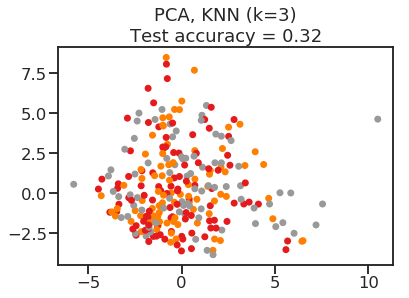

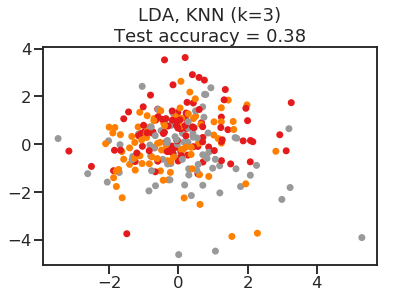

In [15]:
grp_code = df.grp.astype('category').cat.codes.values
np.random.shuffle(grp_code)
y = grp_code
# y = df.grp.astype('category').cat.codes.values
X = sub_df.drop(columns=["grp"]).to_numpy()

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)


dim_reduction_methods = [('PCA', pca), ('LDA', lda)]

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))

In [228]:
df.columns.values

array(['sensitivity', 'grp', 'specificity', 'sparsity', 'pf_width',
       'trans_auc', 'trans_amplitude', 'trans_duration',
       'trans_frequency', 'trans_auc_nr', 'trans_amplitude_nr',
       'trans_duration_nr', 'trans_frequency_nr', 'trans_auc_all',
       'trans_amplitude_all', 'trans_duration_all', 'trans_frequency_all',
       'circ_var', 'circ_var_p', 'spatial_information', 'n_place_fields',
       'fraction_near_rads_8', 'fraction_near_norm_05',
       'fraction_near_norm_10', 'lick_reward_fraction',
       'anticipatory_licking', 'activity_centroid_reward_distance',
       'centroid_reward_distance', 'trial_id', 'condition', 'day',
       'session', 'experimentType', 'startTime', 'mouseID', 'session_day',
       'pc_percentage'], dtype=object)

In [16]:
sns.set('talk')

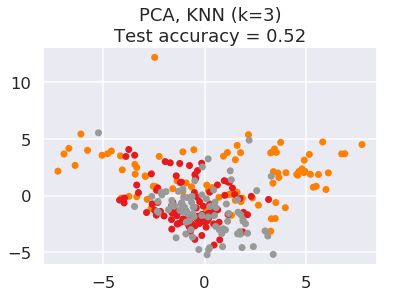

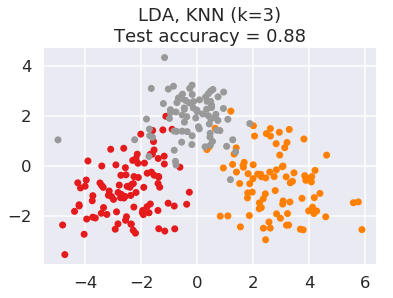

In [26]:
y = df.grp.astype('category').cat.codes.values

sdf = sub_df.drop(columns=["grp"])
#sdf = sdf[["sparsity","trans_auc_nr","pc_percentage",'specificity','trans_auc']]
X = sdf.to_numpy()

# PRE SELECTED FEATURES 
#X = X_new # use for feature selection 

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, stratify=y,
                     random_state=random_state)

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=3)


dim_reduction_methods = [('PCA', pca), ('LDA', lda)]

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    X_new = model.transform(X_train)
    knn.fit(X_new, y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))

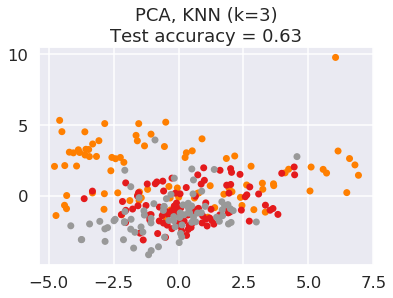

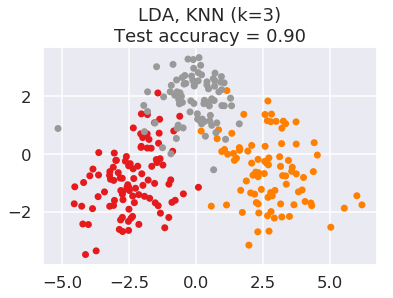

In [338]:
y = df.grp.astype('category').cat.codes.values

sdf = sub_df.drop(columns=["grp"])
#sdf = sdf[["sparsity","trans_auc_nr","pc_percentage",'specificity','trans_auc']]
X = sdf.to_numpy()

# PRE SELECTED FEATURES 
#X = X_new # use for feature selection 

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, stratify=y,
                     random_state=random_state)

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=3)


dim_reduction_methods = [('PCA', pca), ('LDA', lda)]

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    X_new = model.transform(X_train)
    knn.fit(X_new, y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))

### plot the weights

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

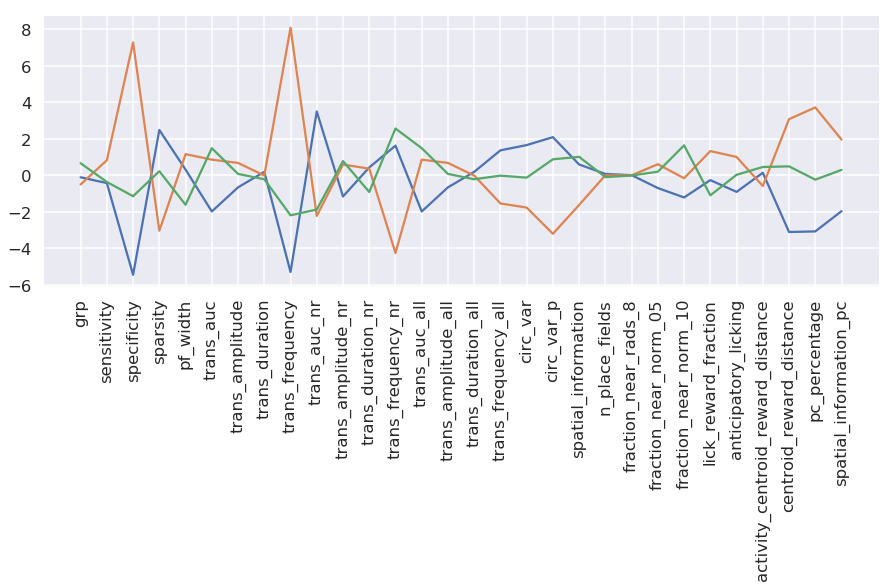

In [32]:
# plot weights with feature labels
fig,ax = plt.subplots(1, figsize=(15,5))
plt.plot(np.arange(0,30),l.coef_.T)
ax.set(xticks = np.arange(0,30), xticklabels=sub_df.columns.values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

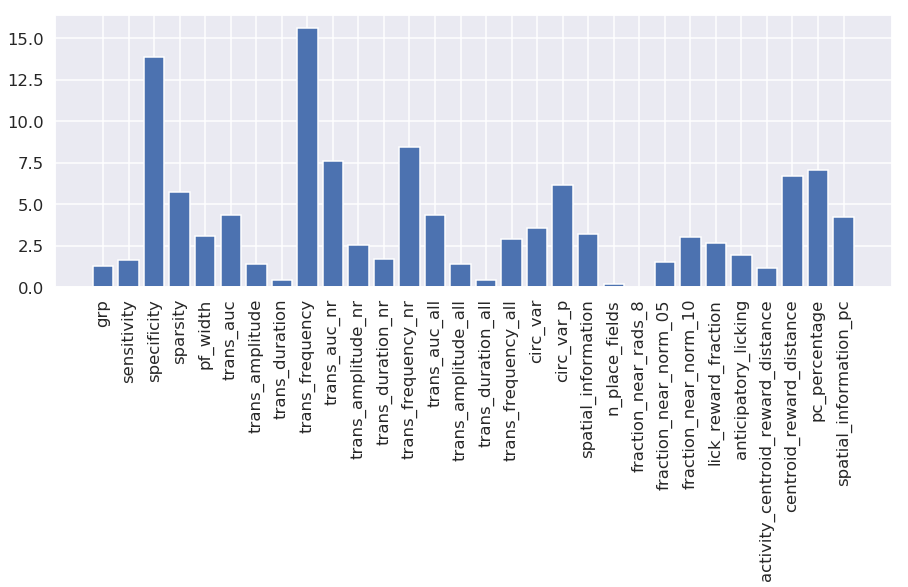

In [38]:
# plot weights with feature labels
fig,ax = plt.subplots(1, figsize=(15,5))
plt.bar(np.arange(0,30),np.sum(np.abs(l.coef_.T),axis=1))
ax.set(xticks = np.arange(0,30), xticklabels=sub_df.columns.values)
plt.xticks(rotation=90)

In [48]:
fsum.shape

(30,)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

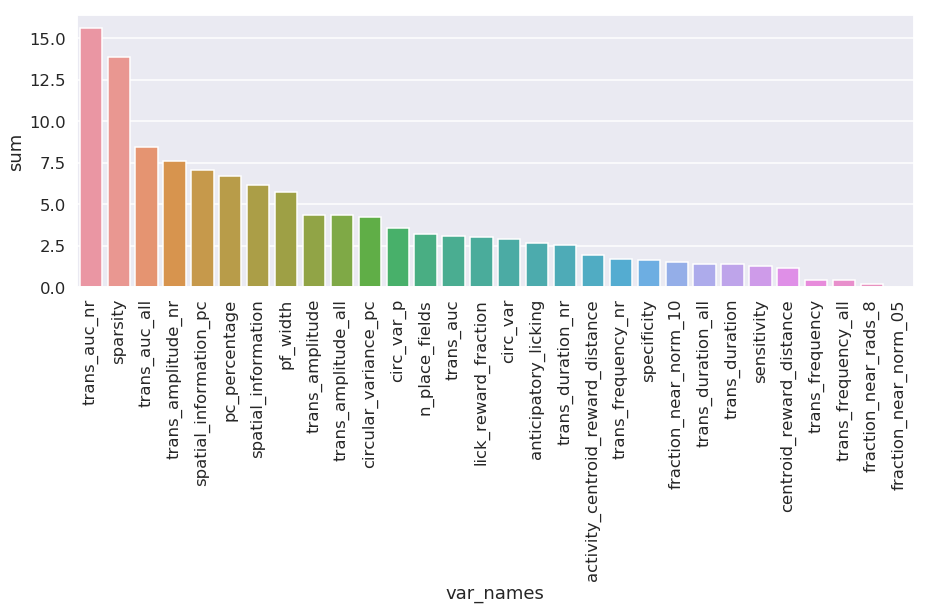

In [56]:
fsum = np.sum(np.abs(l.coef_.T),axis=1)
df_sum = pd.DataFrame.from_dict({"sum":fsum,"var_names":sub_df.columns.values[1:]}) #note dropped group, but should double check
df_sum.sort_values("sum",ascending=False,inplace=True)


fig,ax = plt.subplots(1, figsize=(15,5))
sns.barplot(x="var_names",y="sum",data=df_sum,ax=ax)
plt.xticks(rotation=90)

In [ ]:
# plot weights with feature labels
a = np.sum(np.abs(l.coef_.T),axis=1)


fig,ax = plt.subplots(1, figsize=(15,5))
plt.bar(np.arange(0,30),a)
ax.set(xticks = np.arange(0,30), xticklabels=sub_df.columns.values)
plt.xticks(rotation=90)

(array([0.7574548, 0.2425452]), 1.0)


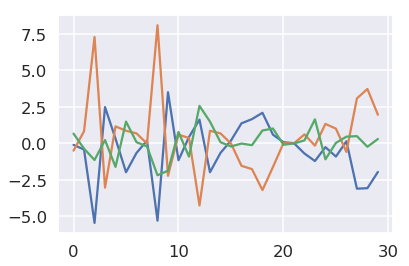

In [27]:
l=lda.steps[1][1] # get estimator
#l=lda.steps[1][1].estimator_ # with model selection
plt.plot(l.coef_.T)
print(l.explained_variance_ratio_,sum(l.explained_variance_ratio_))

(array([0.71109248, 0.28890752]), 1.0)


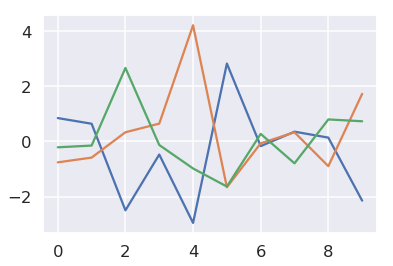

In [313]:
l=lda.steps[1][1] # get estimator
#l=lda.steps[1][1].estimator_ # with model selection
plt.plot(l.coef_.T)
print(l.explained_variance_ratio_,sum(l.explained_variance_ratio_))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

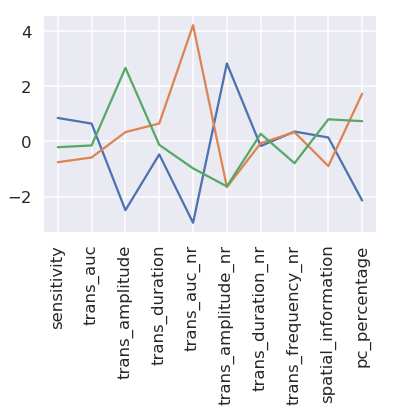

In [337]:
# plot weights with feature labels
fig,ax = plt.subplots(1)
plt.plot(np.arange(0,10),l.coef_.T)
ax.set(xticks = np.arange(0,10), xticklabels=new_names.values)
plt.xticks(rotation=90)

## select features from model

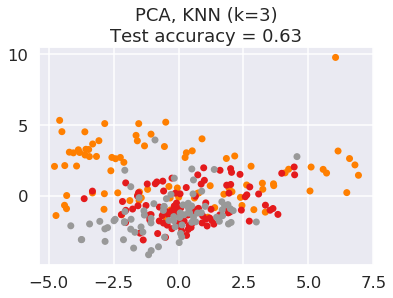

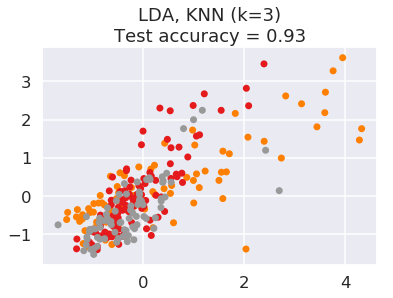

In [266]:
y = df.grp.astype('category').cat.codes.values
lda.steps[1][1].threshold_
sdf = sub_df.drop(columns=["grp"])
#sdf = sdf[["sparsity","trans_auc_nr","pc_percentage",'specificity','trans_auc']]
X = sdf.to_numpy()

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, stratify=y,
                     random_state=random_state)

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    SelectFromModel(LinearDiscriminantAnalysis(n_components=2)))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=3)


dim_reduction_methods = [('PCA', pca), ('LDA', lda)]

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    X_new = model.transform(X_train)
    knn.fit(X_new, y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))

## select features trees classifier

In [321]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
y = df.grp.astype('category').cat.codes.values


sdf = sub_df.drop(columns=["grp"])
#sdf = sdf[["sparsity","trans_auc_nr","pc_percentage",'specificity','trans_auc']]
X = sdf.to_numpy()
print(X.shape)

col_names = sdf.columns # track 

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

# selected columns
kept_features = model.get_support()
new_names = col_names[kept_features]

(268, 24)
(268, 10)


In [323]:
new_names.values

array(['sensitivity', 'trans_auc', 'trans_amplitude', 'trans_duration',
       'trans_auc_nr', 'trans_amplitude_nr', 'trans_duration_nr',
       'trans_frequency_nr', 'spatial_information', 'pc_percentage'],
      dtype=object)

In [260]:
lda.steps[1][1].threshold_

3.676482093148477

## random forest classifier

In [154]:
# https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/home/matt/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [155]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[46  0  4]
 [10 31  3]
 [ 7  1 32]]
Accuracy0.8134328358208955


## feature scaling

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)